# Kondo Model URG
$$
H = \sum_{k\sigma}\left(\epsilon_k - \mu\right)\hat \tau_{k\sigma} + J\sum_{kk^\prime}\vec{S_d}\cdot\vec{s_{kk^\prime}}
$$
$$
\Delta J(D) =  -J^2 n(D) \frac{1}{\omega - \frac{1}{2}\left(D - \mu\right) + \frac{1}{4}J}
$$


In [2]:
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from multiprocessing import Pool
from IPython.display import Markdown as md
import itertools

font = {'family' : 'Source Code Pro',
        'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]=8,8 
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-whitegrid')

## Creating the lattice

In [3]:
def get_Ek(a, t, L = 100):
    mu = 0
    delta_k = 2*np.pi/L     # interval between consecutive points in k-space
    k_max = np.pi/a         # BZ edge
    kx = np.arange(-k_max, k_max + delta_k, delta_k)
    ky = np.copy(kx)
    Kx, Ky = np.meshgrid(kx, ky)
    E = -2*t*(np.cos(Kx*a) + np.cos(Ky*a)) - mu
    surf = plt.contour(Kx, Ky, E, levels=[mu], colors='red')
    kx_F = np.array(surf.allsegs[0])[:,:,0].flatten()
    ky_F = np.array(surf.allsegs[0])[:,:,1].flatten()
    nj = len(kx_F)
    E_eq = np.absolute(-4 * t * np.cos(kx*a) - mu)
    lambda_F = np.absolute(kx)[np.where(E_eq == E_eq.min())]
    print (lambda_F)
    kx = np.arange(lambda_F, k_max + delta_k, delta_k)
    Ek_range = -2*t*(2*np.cos(kx*a)) - mu
    plt.plot(kx, Ek_range)
    nj = 1
    return Ek_range, nj


mu = 0
L = 400
a = 1
t = 1
plt.show()
#Ek_range, nj = get_Ek(a, t, L)
N = 100
Ek_range = np.linspace(0, 4*t, N)
nj = 1
print (nj, N)

1 100


## Num. of states at $E=0$ is $n_j$, we shall work with that.

In [4]:
def rg(w, Ek, J, nj):
    delta = -nj*J**2 /(w - (Ek-mu)/2 + J/(4))
    if J * (J + delta) <= 0:
        return 0
    else:
        return J+delta


In [5]:
def complete_rg(w, J, Ek_range, nj):
    x, y,z = [], [], []
    den = w - (Ek_range[-1]-mu)/2 + J/(4)
    for i in range(N-1, 0, -1):
        Ek = Ek_range[i]
        if den * (w - (Ek - mu)/2 + J/(4)) <= 0 or J == 0:
            #y.append(-(w - (Ek_range[-1]-mu)/2)*4)
            return x, y
        x.append(i)
        y.append(J)
        den = w - (Ek - mu)/2 + J/(4)
        J = rg(w, Ek, J, nj)
    return x, y

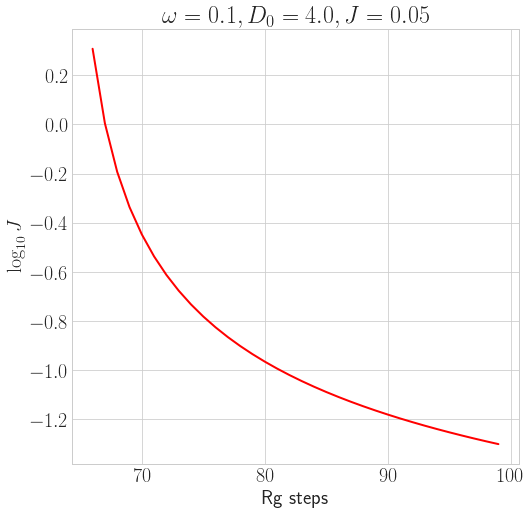

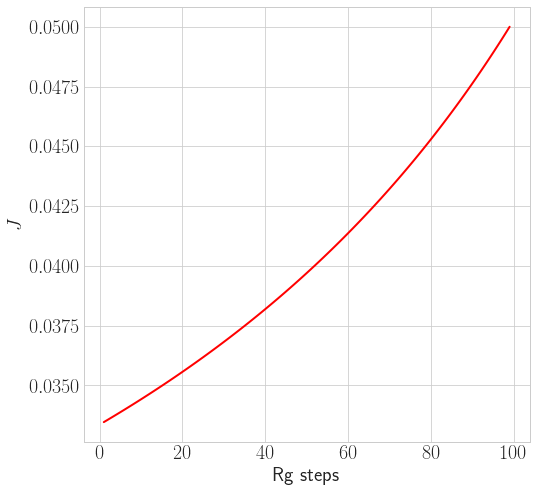

In [9]:
J = 0.05
w = 0.1
x, y = complete_rg(w, J, Ek_range, nj)
plt.plot(x, np.log10(y), color='r')
plt.xlabel(r"Rg steps")
plt.ylabel(r"$\log_{10}J$")
plt.title(r'$\omega={}, D_0={}, J={}$'.format(w,Ek_range[-1],J))
plt.show()
x, y = complete_rg(11, J, Ek_range, nj)
plt.plot(x,y, color='r')
plt.xlabel(r"Rg steps")
plt.ylabel(r"$J$")
plt.show()

In [43]:
def JvsD():
    Jfp = []
    L = 400
    a = 1
    t_range = [1, 10, 100, 1000, 10000, 100000]
    for t in t_range:
        print ("t",t)
        J = np.linspace(0.01, 10, 1000)
        nj = 1
        w = 0.1
        N = 4*t*25
        Ek_range = np.linspace(0, 4*t, N)
        data = itertools.product([w], J, [Ek_range], [nj])
        outp = np.array(Pool(processes=40).starmap(complete_rg, data))
        index = outp[:,0]
        J_arr = outp[:,1]
        J_fp = []
        for i in range(len(index)):
            if len(index[i]) >= int(N/5):
                J_fp.append(J_arr[i][-1])
        max_Jfp = max(J_fp)
        print (max_Jfp)
        Jfp.append(max_Jfp)
    plt.show()
    plt.plot(np.log10(t_range), np.log10(Jfp))
    plt.title(r'$\omega=0.1, J_0=\frac{D}{100}$')
    plt.xlabel(r"$L$")
    plt.ylabel(r"$J^*$")
    plt.show()
JvsD()

t 1
4.7903269402004875
t 10
<ipython-input-43-fddde1e57066>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  outp = np.array(Pool(processes=40).starmap(complete_rg, data))


ValueError: max() arg is an empty sequence

In [43]:
plt.plot(L_range, Jfp)
plt.xscale("log")

NameError: name 'L_range' is not defined

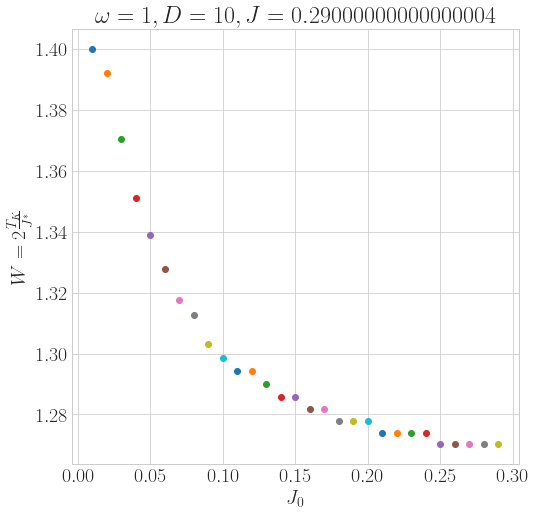

In [57]:
def wilson_num(w,D):
    for J0 in np.arange(0.01,0.3,0.01):
        x, y, z = complete_rg(w, D, J0)
        W = (1/(1 - 2*w/z[-1]))
        plt.scatter(J0, W)
wilson_num(1,10)
plt.xlabel(r"$J_0$")
plt.ylabel(r"$W = 2\frac{T_K}{J^*}$")
plt.show()

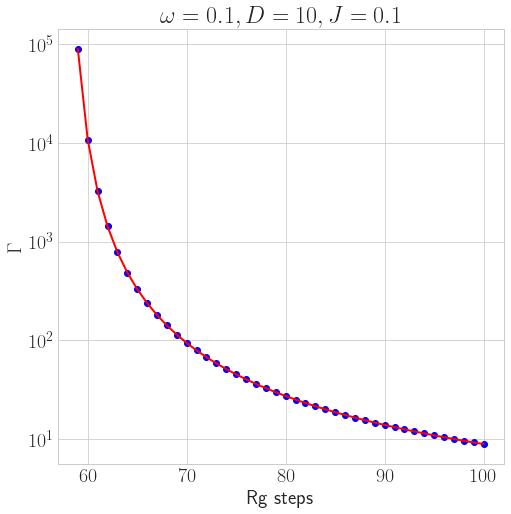

In [66]:
def plot_gamma(w, D0, J):
    x, y, z = [], [], []
    N = 100
    Df = D0/2
    den = w - (D0-Df)/2 + J/4
    count = N
    plt.title(r'$\omega={}, D={}, J={}$'.format(w,Dmax,J))
    for D in np.linspace(D0,Df,N):
        if den * (w - (D0-Df)/2 + J/4) <= 0 or J == 0:
            break
        n = 2*np.pi*N*sqrt(D/Df)
        z.append(n*J**2)
        x.append(count)
        y.append(J)
        den = w - (D0-Df)/2 + J/4
        J = rg(w, D, J, Df, N)
        count -= 1
    plt.plot(x,z, color='r')
    plt.scatter(x,z, color='b', marker="o")
    plt.xlabel(r"Rg steps")
    plt.ylabel(r"$\Gamma$")
    plt.yscale("log")
    plt.show()

plot_gamma(0.1, 20, 0.1)